In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

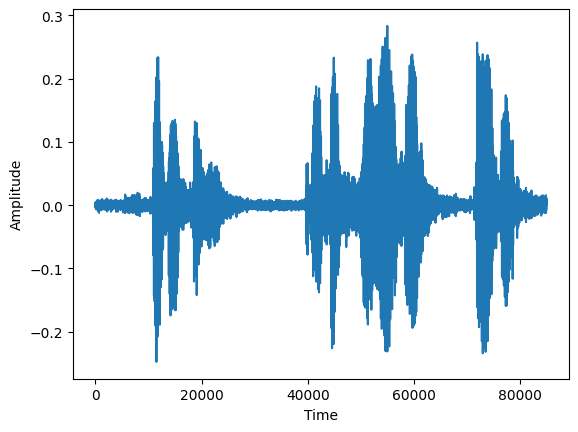

In [7]:
y, sr = librosa.load('a.wav')
# band pass filter for 500-1700 Hz
b, a = scipy.signal.butter(4, [500/(sr/2), 1700/(sr/2)], btype='bandpass')
y = scipy.signal.filtfilt(b, a, y)
# plot amplitude vs time in seconds
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

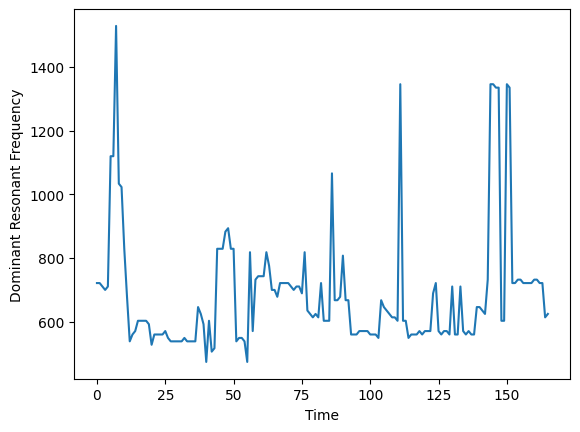

In [15]:
# dominant resonant frequency
def drf(y, sr):
    # compute the short-time Fourier transform of y
    stft = np.abs(librosa.stft(y))
    # find the dominant frequency in each frame
    dominant_freq = np.argmax(stft, axis=0)
    # convert the index of dominant frequencies to frequencies
    dominant_freq = librosa.fft_frequencies(sr=sr, n_fft=2048)[dominant_freq]
    # compute the dominant resonant frequency
    return dominant_freq

# plot dominant resonant frequency vs time in seconds
plt.plot(drf(y, sr))
plt.xlabel('Time')
plt.ylabel('Dominant Resonant Frequency')
plt.show()


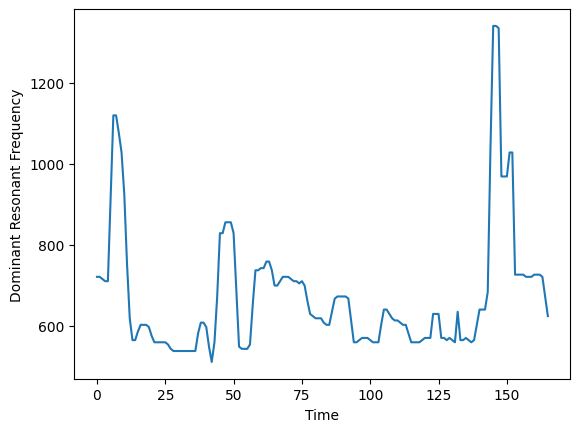

In [16]:
# apply median filter to smooth the curve
def median_filter(x, k):
    # k is the size of the window
    # x is the input signal
    # y is the output signal
    y = np.zeros(len(x))
    for i in range(len(x)):
        # find the lower bound of the window
        lower = max(0, i - math.floor(k/2))
        # find the upper bound of the window
        upper = min(len(x), i + math.floor(k/2))
        # find the median of the window
        y[i] = np.median(x[lower:upper])
    return y

# plot dominant resonant frequency vs time in seconds
plt.plot(median_filter(drf(y, sr), 5))
plt.xlabel('Time')
plt.ylabel('Dominant Resonant Frequency')
plt.show()


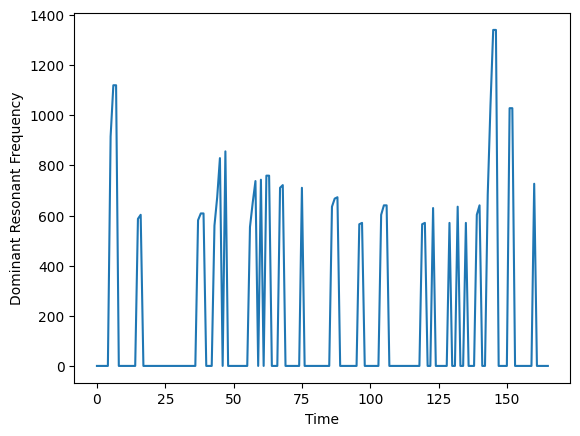

In [18]:
# find the peaks in the curve
def find_peaks(x, k):
    # k is the size of the window
    # x is the input signal
    # y is the output signal
    y = np.zeros(len(x))
    for i in range(len(x)):
        # find the lower bound of the window
        lower = max(0, i - math.floor(k/2))
        # find the upper bound of the window
        upper = min(len(x), i + math.floor(k/2))
        # find the median of the window
        median = np.median(x[lower:upper])
        # if the current value is greater than the median, it is a peak
        if x[i] > median:
            y[i] = x[i]
    return y

# plot the peaks
plt.plot(find_peaks(median_filter(drf(y, sr), 5), 5))
plt.xlabel('Time')
plt.ylabel('Dominant Resonant Frequency')
plt.show()



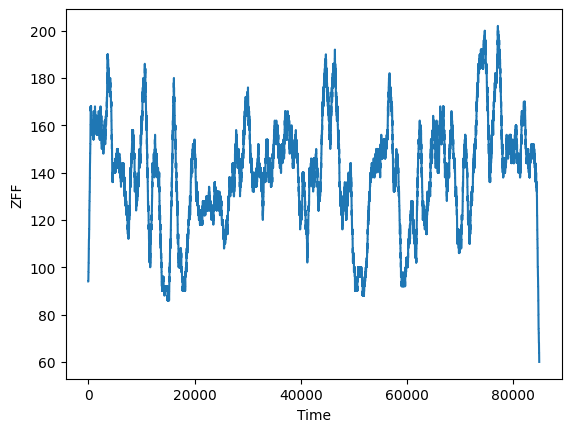

In [24]:
# find voicing regions using zff
def zff(y, sr):
    # y is the input signal
    # sr is the sampling rate
    # z is the output signal
    z = np.zeros(len(y))
    for i in range(len(y)):
        # find the lower bound of the window
        lower = max(0, i - math.floor(0.02*sr))
        # find the upper bound of the window
        upper = min(len(y), i + math.floor(0.02*sr))
        # compute the zero crossing rate
        z[i] = np.sum(np.abs(np.diff(np.sign(y[lower:upper]))))
    return z

# plot the zff
plt.plot(zff(y, sr))
plt.xlabel('Time')
plt.ylabel('ZFF')
plt.show()


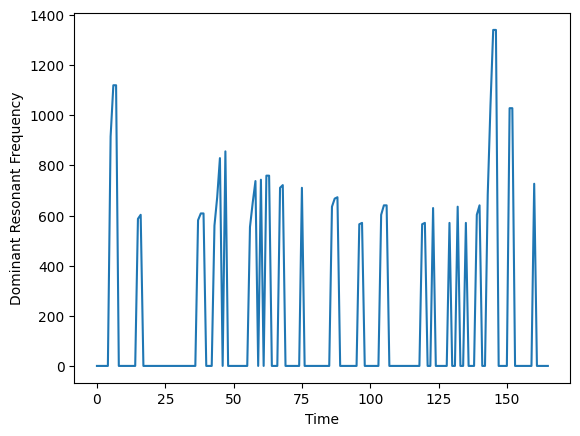

In [28]:
# ignore the peaks that are not in voicing regions
def ignore_peaks(x, z):
    # x is the input signal
    # z is the zff
    # y is the output signal
    y = np.zeros(len(x))
    for i in range(len(x)):
        # if the zff is greater than 1, it is a voicing region
        if z[i] > 1:
            y[i] = x[i]
    return y

# plot the peaks
plt.plot(ignore_peaks(find_peaks(median_filter(drf(y, sr), 5), 5), zff(y, sr)))
plt.xlabel('Time')
plt.ylabel('Dominant Resonant Frequency')
plt.show()
